In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, log_loss
import matplotlib.pyplot as plt

df = pd.read_csv('card_transdata.csv')
display(df)
print(df.shape)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


(1000000, 8)


In [28]:
df[df.isna().any(axis=1)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [29]:
# No data instances with missing values
# no processing needed

In [30]:
df =  df.sample(frac=1) # shuffle the dataset
X = df.iloc[:,[0, 1, 2, 3, 4, 5, 6]]
y = df.iloc[:,[7]]
display(X)
display(y)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
328868,4.567581,6.781246,4.729432,1.0,0.0,1.0,1.0
897502,3.244996,0.127145,2.342467,1.0,1.0,0.0,1.0
363584,25.329541,0.465919,1.202706,1.0,0.0,0.0,0.0
56616,77.866903,1.272823,6.693475,1.0,1.0,0.0,0.0
579942,0.523610,0.066977,0.353011,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
351403,227.040130,0.139043,1.694769,1.0,1.0,0.0,1.0
675962,112.595352,1.223554,4.724717,1.0,0.0,0.0,0.0
222422,0.700916,0.668760,2.968932,0.0,1.0,1.0,0.0
284294,31.092639,0.579543,0.139547,1.0,0.0,0.0,1.0


,fraud
328868,0.0
897502,0.0
363584,0.0
56616,0.0
579942,0.0
...,...
351403,0.0
675962,1.0
222422,0.0
284294,0.0


In [31]:
# using the train test split function (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, random_state=42, test_size=0.2, shuffle=False)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(X_train.head()) # make sure the x and y align to each data instance
print(y_train.head())

800000
800000
200000
200000
        distance_from_home  distance_from_last_transaction  \
328868            4.567581                        6.781246   
897502            3.244996                        0.127145   
363584           25.329541                        0.465919   
56616            77.866903                        1.272823   
579942            0.523610                        0.066977   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
328868                        4.729432              1.0        0.0   
897502                        2.342467              1.0        1.0   
363584                        1.202706              1.0        0.0   
56616                         6.693475              1.0        1.0   
579942                        0.353011              0.0        0.0   

        used_pin_number  online_order  
328868              1.0           1.0  
897502              0.0           1.0  
363584              0.0           0.0  
56616             

In [32]:
model = GaussianNB()
 
# Train the model
model.fit(X_train, y_train.values.ravel())
 
# Predict the labels for the test set
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# class probabilities for log loss function
train_pred_proba = model.predict_proba(X_train)
test_pred_proba = model.predict_proba(X_test)

In [33]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
train_sensitivity = recall_score(y_train, train_pred, average='binary', pos_label=1)
test_sensitivity = recall_score(y_test, test_pred, average='binary', pos_label=1)
train_specificity = recall_score(y_train, train_pred, average='binary', pos_label=0)
test_specificity = recall_score(y_test, test_pred, average='binary', pos_label=0)
train_f1 = f1_score(y_train, train_pred, average='binary')
test_f1 = f1_score(y_test, test_pred, average='binary')
train_logloss = log_loss(y_train, train_pred_proba)
test_logloss = log_loss(y_test, test_pred_proba)


In [34]:
metric = {
    'Metrics': ['Accuracy', 'Sensitivity', 'Specificity', 'F1 Score', 'Log Loss'],
    'Training': [train_accuracy, train_sensitivity, train_specificity, train_f1, train_logloss],
    'Test' : [test_accuracy, test_sensitivity, test_specificity, test_f1, test_logloss]
}

# Replace header by the first row
metric = pd.DataFrame(metric).T
metric.columns = metric.iloc[0]
metric = metric[1:]
display(metric)


Metrics,Accuracy,Sensitivity,Specificity,F1 Score,Log Loss
Training,0.951444,0.605031,0.984626,0.685382,0.306219
Test,0.951845,0.606262,0.984923,0.687457,0.299699


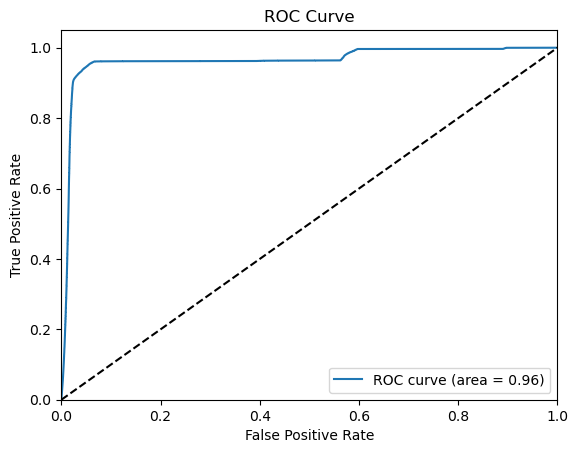

In [35]:
# Plotting ROC Curve (AUC)
test_class_1_prob = test_pred_proba[:,1] # get the probabilites to be labeled 1
fpr, tpr, threshold = metrics.roc_curve(y_test, test_class_1_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()